<a href="https://colab.research.google.com/github/NeuroLuke/ModuleComputationalNeuroscience2024/blob/main/LK_PerceptronExample_20240519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron example**

This notebook shows an example of how a perceptron performs is computations.

Lukas Kunz, 2024.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Createa function that checks for misclassifications using the current set of weights and biases.

In [2]:
def check_for_misclassification(weights, bias, data_point, label):
    estimate = label * (np.dot(weights, data_point) + bias)
    is_misclassification = estimate <= 0
    return is_misclassification

Create a function that updates the weights and biases if necessary.

In [3]:
def update_weights_and_bias(weights, bias, data_point, label):
    weights = weights + label * data_point
    bias = bias + label
    return weights, bias

Define some data points and corresponding class labels.
Class labels need to be -1 or 1.

In [4]:
data = np.array([[1, 2], [2, 3], [3, 3], [2, 1]]) # four data points
labels = np.array([1, 1, -1, -1]) # class labels for the four data points

Initialize weights and bias as zeros. Could also use random numbers for initialization.

In [5]:
weights = np.zeros(2)
bias = 0

Perform the analysis

In [6]:
# preallocations
no_misclassifications = False # whether all data samples have been classified correctly in a given iteration
i_iteration = 0

# report initial weights and bias
print('\nExample computations performed by a perceptron.')
print('\nInitial weights: [{}, {}].'.format(weights[0], weights[1]))
print('Initial bias: {}.'.format(bias))

# iterative estimation of weights and bias
while not no_misclassifications:

    # report
    i_iteration += 1
    print('\nIteration: {}.'.format(i_iteration))

    # store misclassification information for all samples
    is_misclassification = np.zeros(data.shape[0], dtype = bool)

    # loop through all data points
    for i_data in range(data.shape[0]):

        # check whether the data is correctly classified with the current set of weights and bias
        is_misclassification[i_data] = check_for_misclassification(weights, bias, data[i_data], labels[i_data])

        # report
        print('\n\tData sample #{}.'.format(i_data + 1))
        print('\tIs a misclassification: {}.'.format(is_misclassification[i_data]))

        # update weights and bias if necessary
        if is_misclassification[i_data]:
            weights, bias = update_weights_and_bias(weights, bias, data[i_data], labels[i_data])

        # report
        print('\tCurrent weights: [{}, {}].'.format(weights[0], weights[1]))
        print('\tCurrent bias: {}.'.format(bias))

    # check whether there were no misclassifications
    no_misclassifications = not np.any(is_misclassification)
    if no_misclassifications:
        print('\nReached a state of no misclassifications.')




Example computations performed by a perceptron.

Initial weights: [0.0, 0.0].
Initial bias: 0.

Iteration: 1.

	Data sample #1.
	Is a misclassification: True.
	Current weights: [1.0, 2.0].
	Current bias: 1.

	Data sample #2.
	Is a misclassification: False.
	Current weights: [1.0, 2.0].
	Current bias: 1.

	Data sample #3.
	Is a misclassification: True.
	Current weights: [-2.0, -1.0].
	Current bias: 0.

	Data sample #4.
	Is a misclassification: False.
	Current weights: [-2.0, -1.0].
	Current bias: 0.

Iteration: 2.

	Data sample #1.
	Is a misclassification: True.
	Current weights: [-1.0, 1.0].
	Current bias: 1.

	Data sample #2.
	Is a misclassification: False.
	Current weights: [-1.0, 1.0].
	Current bias: 1.

	Data sample #3.
	Is a misclassification: True.
	Current weights: [-4.0, -2.0].
	Current bias: 0.

	Data sample #4.
	Is a misclassification: False.
	Current weights: [-4.0, -2.0].
	Current bias: 0.

Iteration: 3.

	Data sample #1.
	Is a misclassification: True.
	Current weights: [-

Now we can estimate the decision boundary.

The formula for the decision boundary is: w * x + b = 0.

In a scenario where each data sample has two features, the following formula for the decision boundary can be derived:
- w1 * x1 + w2 * x2 + b = 0
- x2 = -1 * (w1 * x1 + b) / w2

In [7]:
# estimate the decision boundary using a range of x-values
x_decision = np.linspace(-10, 10, 1000)
y_decision = -1 * (weights[0] * x_decision + bias) / weights[1]

Let's create a figure showing the data and the decision boundary estimated by the perceptron.

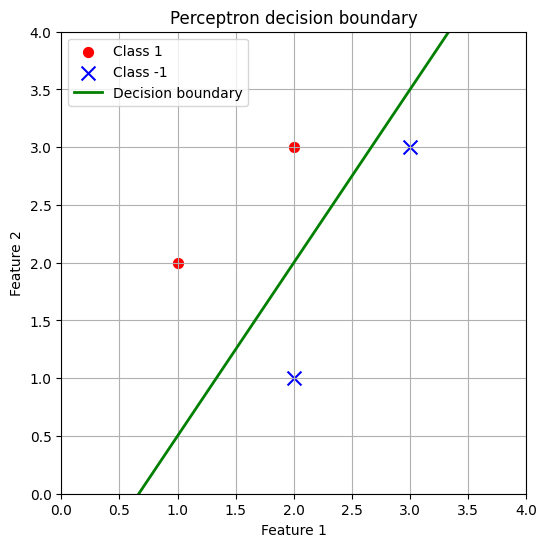

In [9]:
# plot the results
plt.figure(figsize = (6, 6))
plt.title('Perceptron decision boundary')

# data points from both classes
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color = 'red', s = 200, marker = '.', label = 'Class 1')
plt.scatter(data[labels == -1][:, 0], data[labels == -1][:, 1], color = 'blue', s = 100, marker = 'x', label = 'Class -1')

# decision boundary
plt.plot(x_decision, y_decision, 'g-', linewidth = 2, label = 'Decision boundary')

# axes labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.grid(True)
plt.legend()
plt.show()